# Students Exam Scores

This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Aim: Predicting Student Test Scores

### Data Dictionary (column description)

#### Gender: Gender of the student (male/female) 

#### EthnicGroup: Ethnic group of the student (group A to E)

#### ParentEduc: Parent(s) education background (from some_highschool to master's degree)
#### LunchType: School lunch type (standard or free/reduced)
#### TestPrep: Test preparation course followed (completed or none)
#### ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
#### PracticeSport: How often the student parctice sport (never/sometimes/regularly))
#### IsFirstChild: If the child is first child in the family or not (yes/no)
#### NrSiblings: Number of siblings the student has (0 to 7)
#### TransportMeans: Means of transport to school (schoolbus/private)
#### WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
#### MathScore: math test score(0-100)
#### ReadingScore: reading test score(0-100)
#### WritingScore: writing test score(0-100)

In [247]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [248]:
df=pd.read_csv('Expanded_data_with_more_features.csv')
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Preprocessing and  Visualization

In [249]:
df.shape

(30641, 15)

In [250]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [252]:
df.describe() #list numeric

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


## Handle Nulls Values

In [253]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [254]:
df=df.drop('TransportMeans',axis=1)
df=df.drop('EthnicGroup',axis=1)

In [255]:
df.isna().sum()

Gender                    0
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [256]:
df.dropna(inplace=True)
df.isna().sum()

Gender                 0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22737 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               22737 non-null  object 
 1   ParentEduc           22737 non-null  object 
 2   LunchType            22737 non-null  object 
 3   TestPrep             22737 non-null  object 
 4   ParentMaritalStatus  22737 non-null  object 
 5   PracticeSport        22737 non-null  object 
 6   IsFirstChild         22737 non-null  object 
 7   NrSiblings           22737 non-null  float64
 8   WklyStudyHours       22737 non-null  object 
 9   MathScore            22737 non-null  int64  
 10  ReadingScore         22737 non-null  int64  
 11  WritingScore         22737 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.3+ MB


In [258]:
df.head(10)

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,< 5,71,71,74
2,female,master's degree,standard,none,single,sometimes,yes,4.0,< 5,87,93,91
3,male,associate's degree,free/reduced,none,married,never,no,1.0,5 - 10,45,56,42
4,male,some college,standard,none,married,sometimes,yes,0.0,5 - 10,76,78,75
5,female,associate's degree,standard,none,married,regularly,yes,1.0,5 - 10,73,84,79
6,female,some college,standard,completed,widowed,never,no,1.0,5 - 10,85,93,89
7,male,some college,free/reduced,none,married,sometimes,yes,1.0,> 10,41,43,39
8,male,high school,free/reduced,completed,single,sometimes,no,3.0,> 10,65,64,68
11,male,associate's degree,standard,none,divorced,sometimes,yes,1.0,5 - 10,40,52,43
12,female,high school,standard,none,married,regularly,no,1.0,5 - 10,66,82,74


In [259]:
#Add OverallScore column
df['OverallScore'] = round((df['MathScore'] + df['ReadingScore'] + df['WritingScore'])/3, 2)
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [260]:
print(df.dtypes)

Gender                  object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings               int32
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
OverallScore           float64
dtype: object


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22737 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               22737 non-null  object 
 1   ParentEduc           22737 non-null  object 
 2   LunchType            22737 non-null  object 
 3   TestPrep             22737 non-null  object 
 4   ParentMaritalStatus  22737 non-null  object 
 5   PracticeSport        22737 non-null  object 
 6   IsFirstChild         22737 non-null  object 
 7   NrSiblings           22737 non-null  int32  
 8   WklyStudyHours       22737 non-null  object 
 9   MathScore            22737 non-null  int64  
 10  ReadingScore         22737 non-null  int64  
 11  WritingScore         22737 non-null  int64  
 12  OverallScore         22737 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 2.3+ MB


In [262]:
df_orig = df.copy()

In [263]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,OverallScore
count,22737.000000,22737.000000,22737.000000,22737.000000,22737.000000
mean,2.149800,66.552887,69.409289,68.467388,68.143170
std,1.452717,15.335302,14.748962,15.430883,14.434663
min,0.000000,0.000000,10.000000,4.000000,9.000000
25%,1.000000,56.000000,59.000000,58.000000,58.330000
50%,2.000000,67.000000,70.000000,69.000000,68.330000
75%,3.000000,78.000000,80.000000,79.000000,78.670000
max,7.000000,100.000000,100.000000,100.000000,100.000000


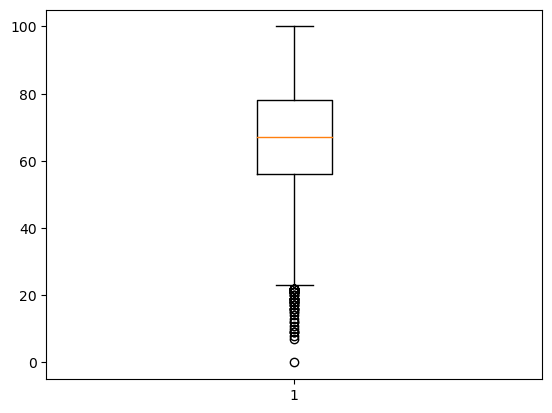

In [264]:
# Create a boxplot of the 'Math score' column
plt.boxplot(df['MathScore'])

# Show the plot
plt.show()

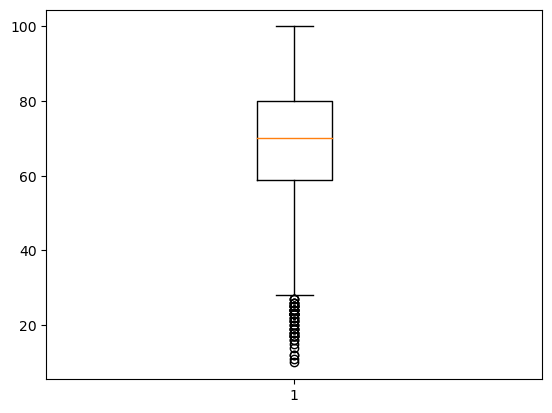

In [265]:
plt.boxplot(df['ReadingScore'])

# Show the plot
plt.show()

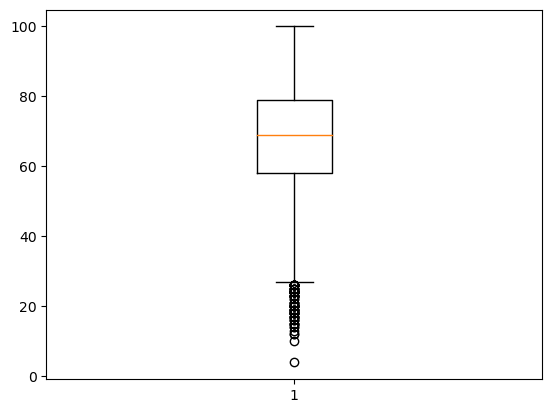

In [266]:
# Create a boxplot of the 'Math score' column
plt.boxplot(df['WritingScore'])

# Show the plot
plt.show()

Assigning the GPA to each Student

GPA	Grad
A	> 80
B	> 70
C	> 60
D	> 50
F	< 50

In [267]:
def GetGrade(OverallScore):
    if OverallScore >= 80:
        return 'A'
    elif OverallScore >= 70:
        return 'B'
    elif OverallScore >= 60:
        return 'C'
    elif OverallScore >= 50:
        return 'D'
    else:
        return 'F'


In [268]:
df['GPA'] = df.apply(lambda df : GetGrade(df['OverallScore']), axis= 1)
df.head(10) 

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,OverallScore,GPA
0,female,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74,72.00,B
2,female,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91,90.33,A
3,male,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42,47.67,F
4,male,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75,76.33,B
5,female,associate's degree,standard,none,married,regularly,yes,1,5 - 10,73,84,79,78.67,B
6,female,some college,standard,completed,widowed,never,no,1,5 - 10,85,93,89,89.00,A
7,male,some college,free/reduced,none,married,sometimes,yes,1,> 10,41,43,39,41.00,F
8,male,high school,free/reduced,completed,single,sometimes,no,3,> 10,65,64,68,65.67,C
11,male,associate's degree,standard,none,divorced,sometimes,yes,1,5 - 10,40,52,43,45.00,F
12,female,high school,standard,none,married,regularly,no,1,5 - 10,66,82,74,74.00,B


In [269]:
#Finding the gender distribution
gender = np.array([0, 0])

for i in df['Gender']:
    if i == 'male':
        gender[0] += 1
    if i == 'female':
        gender[1] += 1

male = gender[0]
female = gender[1]
        
print(f"Male count: {male}")
print(f"Female count: {female}")

Male count: 11227
Female count: 11510


In [270]:
gender_colors = ['#e6e6fa','#008000']

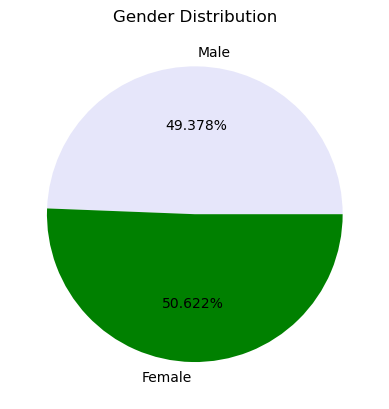

In [271]:
plt.pie(gender, autopct='%0.3f%%', colors=gender_colors, labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.show()

What is the relation between gender and scores?

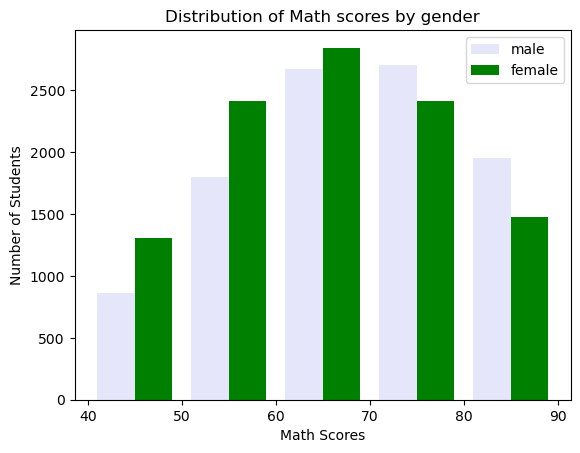

In [272]:
#Grouping Math scores by gender
male_math_scores = df[df['Gender'] == 'male']['MathScore'].tolist()
female_math_scores = df[df['Gender'] == 'female']['MathScore'].tolist()

plt.hist([male_math_scores, female_math_scores], bins=[40, 50, 60, 70, 80, 90], rwidth=0.8, color=gender_colors,label=['male', 'female'])
plt.xlabel('Math Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Math scores by gender')
plt.legend()
plt.show()

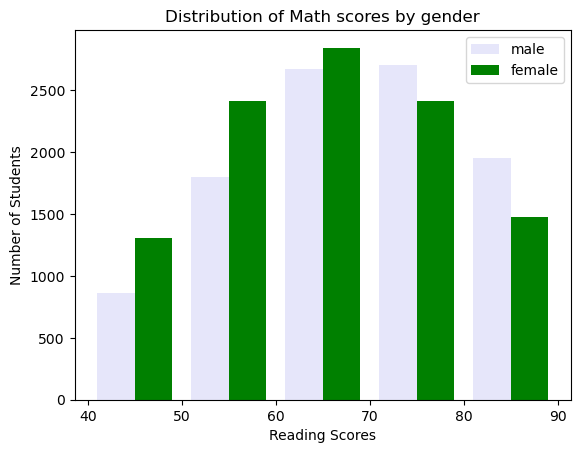

In [273]:
#Grouping Math scores by gender
male_reding_scores = df[df['Gender'] == 'male']['ReadingScore'].tolist()
female_reding_scores = df[df['Gender'] == 'female']['ReadingScore'].tolist()

plt.hist([male_math_scores, female_math_scores], bins=[40, 50, 60, 70, 80, 90], rwidth=0.8, color=gender_colors,label=['male', 'female'])
plt.xlabel('Reading Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Math scores by gender')
plt.legend()
plt.show()

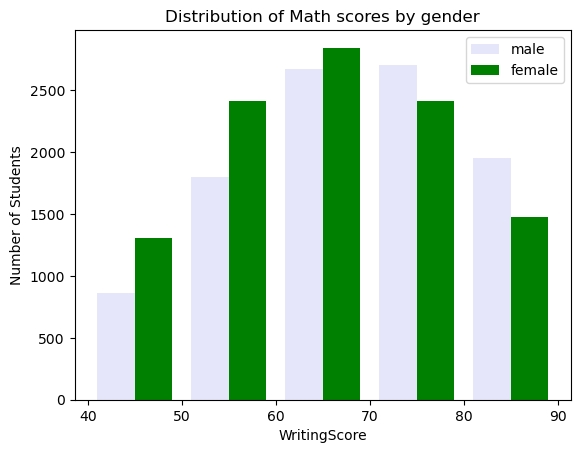

In [274]:
#Grouping Math scores by gender
male_reding_scores = df[df['Gender'] == 'male']['WritingScore'].tolist()
female_reding_scores = df[df['Gender'] == 'female']['WritingScore'].tolist()

plt.hist([male_math_scores, female_math_scores], bins=[40, 50, 60, 70, 80, 90], rwidth=0.8, color=gender_colors,label=['male', 'female'])
plt.xlabel('WritingScore')
plt.ylabel('Number of Students')
plt.title('Distribution of Math scores by gender')
plt.legend()
plt.show()

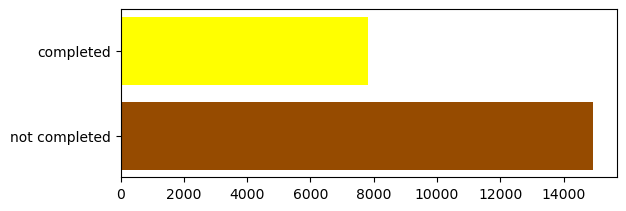

In [275]:
course=np.array([0,0])
info_course=["not completed","completed"]
for i in df["TestPrep"] :
    if i=="none" :
        course[0]+=1
    if i=="completed" :
        course[1]+=1
plt.subplot(2,1,1)
plt.barh(info_course,course,color=("#964b00","#ffff00"))


plt.show()

<BarContainer object of 4 artists>

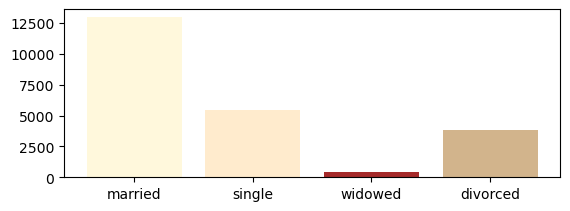

In [276]:
married=np.array([0,0,0,0])
label=["married","single","widowed","divorced"]

for i in df["ParentMaritalStatus"] :
    if i=="married" :
        married[0]+=1
    if i=="single" :
        married[1]+=1
    if i=="widowed" :
        married[2]+=1
    if i=="divorced" :
        married[3]+=1
        plt.subplot(2,1,1)

plt.bar(label,married,color=("#FFF8DC","#FFEBCD","#A52A2A","#D2B48C"))


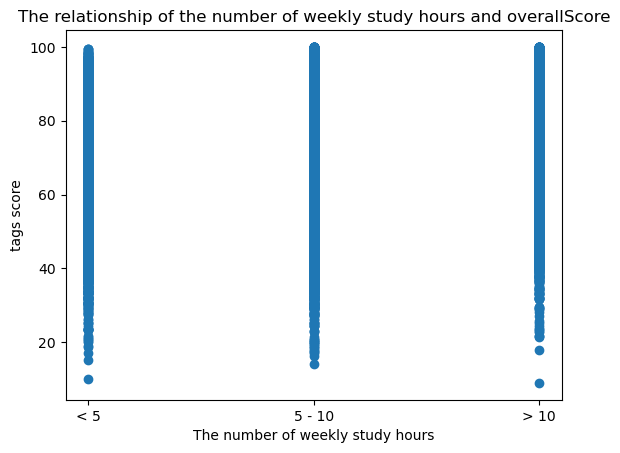

In [277]:
#Correlation between the number of weekly study hours and ovrallscore students
plt.scatter(df['WklyStudyHours'], df['OverallScore'])
plt.xlabel('The number of weekly study hours')
plt.ylabel('tags score')
plt.title('The relationship of the number of weekly study hours and overallScore')
plt.show()

# Machine Learning 

In [278]:
categorical_columns = ['IsFirstChild', 'PracticeSport', 'ParentMaritalStatus', 'TestPrep', 'LunchType', 'ParentEduc', 'Gender', 'LunchType','WklyStudyHours']

encoder = LabelEncoder()
for x in categorical_columns:
      df[x] =encoder.fit_transform(df[x])


In [279]:
df

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,OverallScore,GPA
0,0,1,1,1,1,1,1,3,1,71,71,74,72.00,B
2,0,3,1,1,2,2,1,4,1,87,93,91,90.33,A
3,1,0,0,1,1,0,0,1,0,45,56,42,47.67,F
4,1,4,1,1,1,2,1,0,0,76,78,75,76.33,B
5,0,0,1,1,1,1,1,1,0,73,84,79,78.67,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,2,1,1,2,2,0,2,0,59,61,65,61.67,C
30637,1,2,1,1,2,1,0,1,0,58,53,51,54.00,D
30638,0,2,0,0,1,2,0,1,0,61,70,67,66.00,C
30639,0,0,1,0,1,1,0,3,0,82,90,93,88.33,A


In [280]:
df.drop(['GPA'],axis=1).corr()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,OverallScore
Gender,1.000000,0.001832,0.001389,0.008871,0.003770,0.003709,0.005252,0.000133,0.004534,0.163873,-0.238672,-0.289982,-0.126589
ParentEduc,0.001832,1.000000,0.008066,-0.005147,-0.002767,-0.009661,0.005183,0.000160,0.011944,-0.113528,-0.116227,-0.129245,-0.125845
LunchType,0.001389,0.008066,1.000000,0.002409,-0.014996,-0.003828,0.003152,0.002562,0.011169,0.369293,0.256854,0.273190,0.315609
TestPrep,0.008871,-0.005147,0.002409,1.000000,0.001018,-0.009043,0.000455,0.005680,0.003037,-0.140515,-0.211983,-0.293660,-0.226604
ParentMaritalStatus,0.003770,-0.002767,-0.014996,0.001018,1.000000,0.001956,-0.009110,-0.005464,-0.009854,-0.004274,-0.005605,-0.006540,-0.005754
PracticeSport,0.003709,-0.009661,-0.003828,-0.009043,0.001956,1.000000,-0.002230,-0.000407,-0.004336,0.015982,0.005350,0.004384,0.009042
IsFirstChild,0.005252,0.005183,0.003152,0.000455,-0.009110,-0.002230,1.000000,-0.121297,-0.002816,0.011142,0.010475,0.007338,0.010128
NrSiblings,0.000133,0.000160,0.002562,0.005680,-0.005464,-0.000407,-0.121297,1.000000,0.001930,-0.000472,-0.000731,-0.000384,-0.000552
WklyStudyHours,0.004534,0.011944,0.011169,0.003037,-0.009854,-0.004336,-0.002816,0.001930,1.000000,0.024368,0.009274,0.016595,0.017702
MathScore,0.163873,-0.113528,0.369293,-0.140515,-0.004274,0.015982,0.011142,-0.000472,0.024368,1.000000,0.816818,0.806004,0.919542


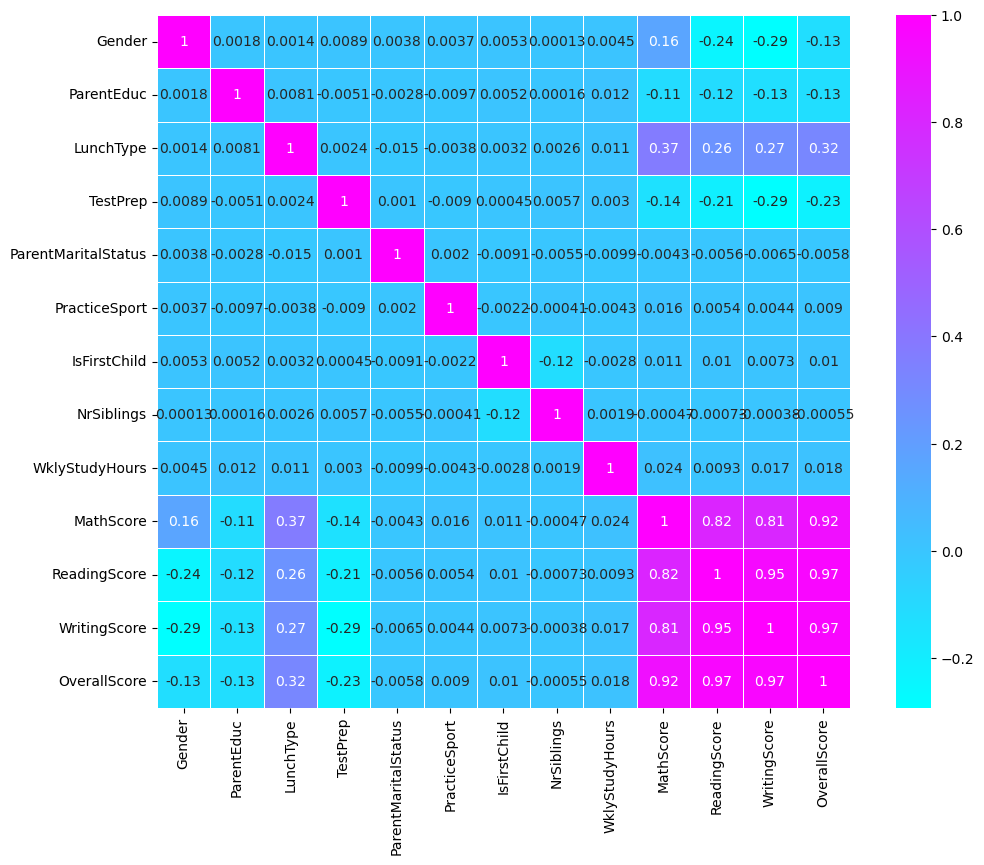

In [281]:
corrmat = df.drop(['GPA'],axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="cool", square=True,linewidths=.5, annot=True)
plt.show()

In [288]:
x=df.drop(['OverallScore','GPA'],axis=1)
y=df['OverallScore']

In [289]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [297]:


pipeline = make_pipeline(
    StandardScaler(),
    SVR()
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")


R-squared (R2): 0.9958624214945115
Mean Squared Error (MSE): 0.8477222400326211


In [298]:
models = {
    "Linear Regreesion": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Decison Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor()
}

In [299]:
param_grids = {
    "Linear Regreesion": {},  # No hyperparameters to tune for Linear Regression
    "Support Vector Regressor": {'C': [1, 10, 100, 1000], 'epsilon': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    "Decison Tree Regressor": {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest Regressor": {'n_estimators': [4,6,9,10,15,100, 200, 300], 'max_depth': [2,3,5, 10, 20]},
    "Gradient Boosting Regressor": {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]},
    "K Neighbors Regressor": {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' : [10, 20, 30, 50] },
    "Ada Boost Regressor": {'n_estimators': [50, 100], 'learning_rate' : [0.01,0.05,0.1,0.3,1],'loss' : ['linear', 'square', 'exponential']}
}


In [300]:
def evaluate_model(X_train, X_test, y_train, y_test, models,cv=5):
    report = {}
    
    for model_name, model in models.items():
        try:
            param_grid = param_grids[model_name]
            grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='r2', error_score='raise')
            grid_search.fit(X_train, y_train)
            
            best_model = grid_search.best_estimator_
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            
            r2score = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='r2')
            mean_cv_score = cv_scores.mean()

            report[model_name] = {
                "R2 SCORE": r2score,
                "MEAN SQUARED ERROR": mse,
                "MEAN ABSOLUTE ERROR": mae,
                "CV Mean R2": mean_cv_score
            }
        except Exception as e:
            print(f"An error occurred with {model_name}: {e}")

    return report


In [301]:
model_matrics = evaluate_model(X_train, X_test, y_train, y_test, models)
for model, metrics in model_matrics.items():
    print(f"{model} Metrics:")
    print(f"  Accuracy: {metrics['R2 SCORE']}")
    print(f"  Mean Squared Error: {metrics['MEAN SQUARED ERROR']}")
    print(f"  Mean Absolute Error: {metrics['MEAN ABSOLUTE ERROR']}")
    print(f"  cross-validation: {metrics['CV Mean R2']}")
    print("\n" + "=" * 30 + "\n")
    

Linear Regreesion Metrics:
  Accuracy: 0.9999999642430045
  Mean Squared Error: 7.3260242101267485e-06
  Mean Absolute Error: 0.002213186924798624
  cross-validation: 0.9999999648418143


Support Vector Regressor Metrics:
  Accuracy: 0.9999910447242925
  Mean Squared Error: 0.0018347896898761663
  Mean Absolute Error: 0.035385553283792545
  cross-validation: 0.9999912791886242


Decison Tree Regressor Metrics:
  Accuracy: 0.9982262552417182
  Mean Squared Error: 0.3634113232515716
  Mean Absolute Error: 0.418615264340858
  cross-validation: 0.9979972284750305


Random Forest Regressor Metrics:
  Accuracy: 0.9997354861327676
  Mean Squared Error: 0.054194570025057474
  Mean Absolute Error: 0.1470959452632471
  cross-validation: 0.9996709270655927


Gradient Boosting Regressor Metrics:
  Accuracy: 0.9996157098056248
  Mean Squared Error: 0.07873478266725673
  Mean Absolute Error: 0.21738991948929606
  cross-validation: 0.9996181234387922


K Neighbors Regressor Metrics:
  Accuracy: 0.999

In [302]:
acc={
   'Model':[],
    'Score':[]
}
for model, metrics in model_matrics.items():
    acc['Model'].append(model)
    acc['Score'].append(metrics['R2 SCORE'])
acc = pd.DataFrame(acc)
acc.sort_values(by='Score', ascending=False)


,Model,Score
0,Linear Regreesion,1.000000
1,Support Vector Regressor,0.999991
3,Random Forest Regressor,0.999735
5,K Neighbors Regressor,0.999703
4,Gradient Boosting Regressor,0.999616
2,Decison Tree Regressor,0.998226
6,Ada Boost Regressor,0.990284


<img scr='am.jpg'/>

<img src="am.jpg" />